# Практическая работа №4: Элементы корреляционного анализа. Проверка статистической гипотезы о равенстве коэффициента корреляции нулю
Выполнили студенты гр. 0381 Котов Дмитрий и Михайлов Виктор. Вариант №8

## Цель работы

Освоение основных понятий, связанных с корреляционной зависимостью между случайными величинами, статистическими гипотезами и проверкой их «справедливости».

## Основные теоретические положения

$\left \{ X;Y \right \}$ - система двух случайных величин

Эти случайные величины независимыми, если:

$f(x,y) = f_1(x) \cdot f_2(y)$

Функциональная зависимость:

$y = g(x)$

Статистическая зависимость:

$\varphi (x|y) = \frac{f(x,y)}{f_2(y)}$

$\phi  (y|x) = \frac{f(x,y)}{f_1(x)}$

Частным случаем статистической зависимости является корреляционная зависимость. Корреляционной называют статистическую зависимость двух случайных величин, при которой изменение значения одной из случайных величин приводит к изменению математического ожидания другой случайной величины:

$M(X|y) = q_1(y)$

$M(Y|x) = q_2(x)$

Корреляционный момент:

$\mu_{xy} = M\left \{ \left [ x-M(X) \right ] \cdot \left [ y - M(Y) \right ] \right \}$

Коэффициент корреляции:

$r_{xy} = \frac{\mu_{xy}}{\sigma_x \sigma_y}$





## Постановка задачи

Из заданной генеральной совокупности сформировать выборку по второму признаку. Провести статистическую обработку второй выборки в объёме практических работ №1 и №2, с целью определения точечных статистических оценок параметров распределения исследуемого признака (математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса и коэффициента вариации). Для системы двух случайных величин X (первый признак) и Y (второй признак) сформировать двумерную выборку и найти статистическую оценку коэффициента корреляции, построить доверительный интервал для коэффициента корреляции и осуществить проверку статистической гипотезы о равенстве коэффициента корреляции нулю. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import math
from scipy import stats

### Восстановим результаты практической работы №1 (выборочные данные, которые необходимо обработать) (первая выборка)

In [ ]:
data = pd.read_csv("/content/sample.csv")
data = data.sample(n=118, random_state=118)
data = data.sort_index()
data = data.reset_index(drop=True)
data.to_csv("/content/выборка.csv", index=False)

df = pd.read_csv("/content/выборка.csv")

df_nu = df.drop("E", axis=1)

df_nu = df_nu.sort_values(by=["nu"], ignore_index = True)

x = df_nu['nu']
var_series = pd.DataFrame({'nu': x.value_counts().sort_index().index})
var_series # Вариационный ряд

# Интервальный ряд
n=118
k = int(np.floor(1+3.31*np.log10(n))) # количество интервалов
h = int(np.ceil((max(x)-min(x))/k)) # ширина интервала
interval_bounds = [] # границы интервалов
x_min = min(var_series['nu'])
interval_bounds.append(x_min)
for i in range(1, k):
  interval_bounds.append(x_min+h*i)
interval_bounds.append(x_min+k*h)

counts = x.value_counts().sort_index().values # абсолютные частоты
rel_counts = x.value_counts(normalize=True).sort_index().values # относительные частоты

interval_series = pd.concat([var_series, pd.DataFrame({'n_i': counts, 'p_i': rel_counts})], axis=1)
interval_series["interval_i-i+1"] = pd.cut(interval_series["nu"], bins=interval_bounds, right=False)
interval_series = interval_series.groupby(["interval_i-i+1"])[["n_i", "p_i"]].apply(sum).reset_index()
interval_series["avg_i"] = np.array([np.mean([interval_bounds[i], interval_bounds[i+1]], axis=0) for i in range(k)])
interval_series = interval_series[["interval_i-i+1", "avg_i", "n_i", "p_i"]]

# Добавим накопленные частоты
n_cum = [] # накопленные абсолютные частоты
p_cum = [] # накопленные относительные частоты

n_abs, p_abs = interval_series['n_i'], interval_series['p_i']

for i in range(len(n_abs)):
  n_cum.append(sum(n_abs[:i+1]))
  p_cum.append(sum(p_abs[:i+1]))

interval_series['n_cum_i'] = n_cum
interval_series['p_cum_i'] = p_cum

### Статистическая обработка второй выборки в объеме практических работ №1 и №2



In [ ]:
data = pd.read_csv("/content/sample.csv")
data = data.sample(n=118, random_state=118)
data = data.sort_index()
data = data.reset_index(drop=True)
data.to_csv("/content/выборка.csv", index=False)

df = pd.read_csv("/content/выборка.csv")

df_E = df.drop("nu", axis=1)

df_E = df_E.sort_values(by=["E"], ignore_index = True)

x_E = df_E['E']
var_series_E = pd.DataFrame({'E': x_E.value_counts().sort_index().index})
var_series_E  # Вариационный ряд

# Интервальный ряд
n=118
k = int(np.floor(1+3.31*np.log10(n))) # количество интервалов
h_E = int(np.ceil((max(x_E)-min(x_E))/k)) # ширина интервала
interval_bounds_E = [] # границы интервалов
x_min_E = min(var_series_E['E'])
interval_bounds_E.append(x_min_E)
for i in range(1, k):
  interval_bounds_E.append(x_min_E+h_E*i)
interval_bounds_E.append(x_min_E+k*h_E)

counts_E = x_E.value_counts().sort_index().values # абсолютные частоты
rel_counts_E = x_E.value_counts(normalize=True).sort_index().values # относительные частоты

interval_series_E = pd.concat([var_series_E, pd.DataFrame({'n_i': counts_E, 'p_i': rel_counts_E})], axis=1)
interval_series_E["interval_i-i+1"] = pd.cut(interval_series_E["E"], bins=interval_bounds_E, right=False)
interval_series_E = interval_series_E.groupby(["interval_i-i+1"])[["n_i", "p_i"]].apply(sum).reset_index()
interval_series_E["avg_i"] = np.array([np.mean([interval_bounds_E[i], interval_bounds_E[i+1]], axis=0) for i in range(k)])
interval_series_E = interval_series_E[["interval_i-i+1", "avg_i", "n_i", "p_i"]]

# Добавим накопленные частоты
n_cum_E = [] # накопленные абсолютные частоты
p_cum_E = [] # накопленные относительные частоты

n_abs_E, p_abs_E = interval_series_E['n_i'], interval_series_E['p_i']

for i in range(len(n_abs_E)):
  n_cum_E.append(sum(n_abs_E[:i+1]))
  p_cum_E.append(sum(p_abs_E[:i+1]))

interval_series_E['n_cum_i'] = n_cum_E
interval_series_E['p_cum_i'] = p_cum_E

# Вычислим условные варианты
C_E = interval_series_E["avg_i"][3]
u_E = [(x-C_E)/h_E for x in interval_series_E["avg_i"]]

# По методу произведений вычислим условные моменты
nu_E = [x*y for x,y in zip(u_E, interval_series_E['p_i'])]
nu2_E = [(x**2)*y for x,y in zip(u_E, interval_series_E['p_i'])]
nu3_E = [(x**3)*y for x,y in zip(u_E, interval_series_E['p_i'])]
nu4_E = [(x**4)*y for x,y in zip(u_E, interval_series_E['p_i'])]
nuplus1_4_E = [((x+1)**4)*y for x,y in zip(u_E, interval_series_E['p_i'])]

sum_nu_E = sum(nu_E)
sum_nu2_E = sum(nu2_E)
sum_nu3_E = sum(nu3_E)
sum_nu4_E = sum(nu4_E)
sum_nuplus1_4_E = sum(nuplus1_4_E)

N = 7 # размер выборки

M1_star_E = sum_nu_E/N  # условный эмпирический момент 1-го порядка
M1_E = M1_star_E*h_E + C_E  # эмпирический начальный момент

M2_star_E = sum_nu2_E/N  # условный эмпирический момент 2-го порядка
m2_E = (M2_star_E - (M1_star_E**2))*(h_E**2)  # эмпирический центральный момент 2-го порядка

M3_star_E = sum_nu3_E/N  # условный эмпирический момент 3-го порядка
m3_E = (M3_star_E - 3*M2_star_E*M1_star_E + 2*(M1_star_E**3))*(h_E**3)  # эмпирический центральный момент 3-го порядка

M4_star_E = sum_nu4_E/N  # условный эмпирический момент 4-го порядка
m4_E = (M4_star_E - 4*M3_star_E*M1_star_E + 6*(M1_star_E**2)*M2_star_E - 3*(M1_star_E**4))*(h**4)  # эмпирический центральный момент 3-го порядка

M_E= [M1_star_E, M2_star_E, M3_star_E, M4_star_E]
m_E = [M1_E, m2_E, m3_E, m4_E]

x_mean1_E = sum(interval_series_E["avg_i"]*interval_series_E["n_i"])/len(x_E)  # Выборочное среднее

xjv_E = [(x-x_mean1_E)**2 for x in interval_series_E["avg_i"]]
x_var_E = sum(interval_series_E["p_i"]*xjv_E)/N  # Дисперсия

x_var_fix_E = np.var(x_E, ddof = 1) # исправленная оценка дисперсии

unbaised_msd_E = np.sqrt(np.var(x_E, ddof = 1)) # среднеквадратическое отклонение исправленной дисперсии

baised_msd_E = np.sqrt(np.var(x_E)) # среднеквадратическое отклонение смещённой дисперсии

asym_E = m_E[2]/pow(unbaised_msd_E,3) # асимметрия

kurt_E = m_E[3]/pow(unbaised_msd_E,4) # Эксцес

left_bound_moda_E = 3  #граница интервала, частота которого является  наибольшей
Moda_E = interval_bounds_E[left_bound_moda_E] + (interval_bounds_E[left_bound_moda_E+1] - interval_bounds_E[left_bound_moda_E])*((interval_series_E["n_i"][left_bound_moda_E] - interval_series_E["n_i"][left_bound_moda_E - 1])/(2*interval_series_E["n_i"][left_bound_moda_E] - interval_series_E["n_i"][left_bound_moda_E - 1] - interval_series_E["n_i"][left_bound_moda_E + 1]))

left_bound_median_E = int(len(interval_bounds_E)/2 - 1)
Mediana_E = interval_bounds_E[left_bound_median_E] + (n/2 - interval_series_E["n_cum_i"][left_bound_median_E-1])*(interval_bounds_E[left_bound_median_E+1] - interval_bounds_E[left_bound_median_E])/interval_series_E["n_i"][left_bound_median_E]

CV_E = unbaised_msd_E/x_mean1_E  # коэфф вариации

In [ ]:
interval_series_E

,interval_i-i+1,avg_i,n_i,p_i,n_cum_i,p_cum_i
0,"[71.9, 88.9)",80.4,6.0,0.050847,6.0,0.050847
1,"[88.9, 105.9)",97.4,14.0,0.118644,20.0,0.169492
2,"[105.9, 122.9)",114.4,26.0,0.220339,46.0,0.389831
3,"[122.9, 139.9)",131.4,30.0,0.254237,76.0,0.644068
4,"[139.9, 156.9)",148.4,26.0,0.220339,102.0,0.864407
5,"[156.9, 173.9)",165.4,11.0,0.093220,113.0,0.957627
6,"[173.9, 190.9)",182.4,5.0,0.042373,118.0,1.000000


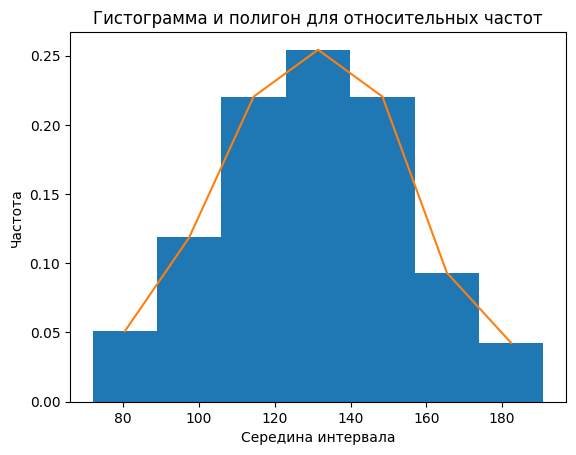

In [ ]:
intervals_E = [[] for i in range(k)]
for value in range(k):
  intervals_E[value].append(interval_bounds_E[value])
  intervals_E[value].append(interval_bounds_E[value+1])
x_polygon_E = [(border[0] + border[1]) / 2 for border in intervals_E]
fig, ax = plt.subplots()
ax.hist(x_E, bins=interval_bounds_E, weights=np.ones(len(x_E)) / len(x_E))
ax.plot(x_polygon_E, interval_series_E['p_i'])
plt.title('Гистограмма и полигон для относительных частот')
plt.xlabel('Середина интервала')
plt.ylabel('Частота')
plt.show()

###2. Построим двумерный интервальный вариационный ряд, оформить в виде таблицы.

In [ ]:
dim2_series = [[0]*k for i in range(k)]
avg = list(interval_series['avg_i'])
avg_E = list(interval_series_E['avg_i'])
c = 0
L = 0
for e, nu in zip(x_E, x):
  L += 1
  e_nu_count = False
  for i in range(k):
    for j in range(k):
      if avg[i] - h/2 <= nu < avg[i] + h/2 and avg_E[j] - h_E/2 <= e < avg_E[j] + h_E/2:
        c += 1
        dim2_series[j][i] += 1
        e_nu_count = True
  if not e_nu_count:
      print(L, e, nu)
dim2_series, c

([[6, 0, 0, 0, 0, 0, 0],
  [3, 11, 0, 0, 0, 0, 0],
  [0, 6, 20, 0, 0, 0, 0],
  [0, 0, 9, 21, 0, 0, 0],
  [0, 0, 0, 8, 15, 3, 0],
  [0, 0, 0, 0, 0, 11, 0],
  [0, 0, 0, 0, 0, 0, 5]],
 118)

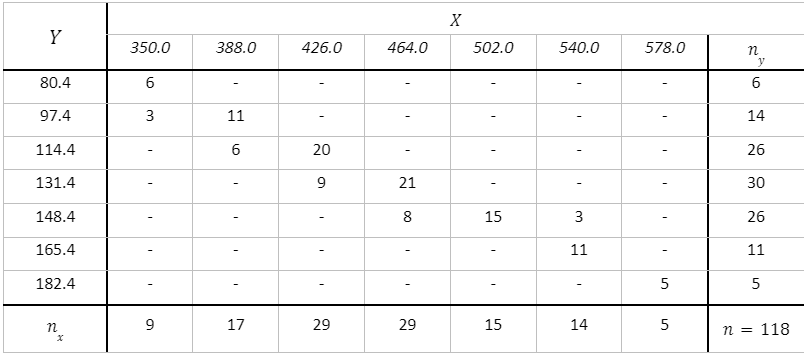

###3. По полученному двумерному интервальному вариационному ряду построим корреляционную таблицу.

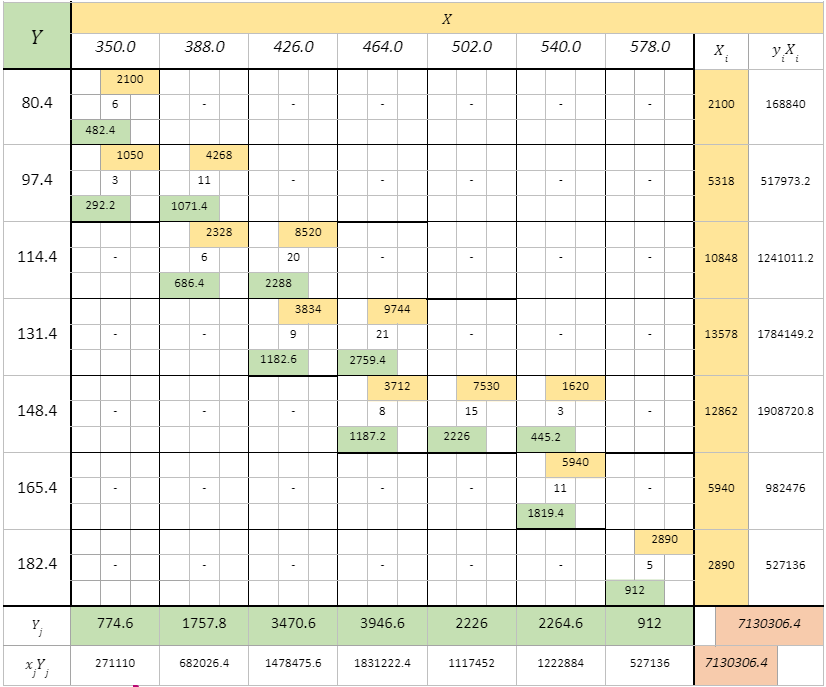

**Выводы:**
- можно заметить, что значения выборки в основном скоплены вдоль главной диагонали, что позволяет делать предположение и высоком коэффициенте корреляции.


###4. Исходя из результатов корреляционной таблицы вычислим значение выборочного коэффициента корреляции двумя способами: с помощью стандартной формулы и с помощью условных вариант. Убедимся, что результаты совпадают.


In [ ]:
x_mean1 = sum(interval_series["avg_i"]*interval_series["n_i"])/len(x)
xjv = [(x-x_mean1)**2 for x in interval_series["avg_i"]]
x_var = sum(interval_series["p_i"]*xjv)/N
unbaised_msd = np.sqrt(np.var(x, ddof = 1)) # среднеквадратическое отклонение исправленной дисперсии


In [ ]:
unbaised_msd

59.07945933104514

$$
 \overline{r}_{xy}=\frac{Σ_i^{K_{y}}Σ_j^{K_{y}}n_{ij}y_ix_j-N\overline{x}_в\overline{y}_в}{NS_xS_y} = \frac{7130306.4 - 118 ⋅ 453.7 ⋅ 130.1}{118 ⋅ 59.08 ⋅ 24.14}=0.9816
$$

**Выводы:** предположение о высоком коэффициенте корреляции подтверждено численно.


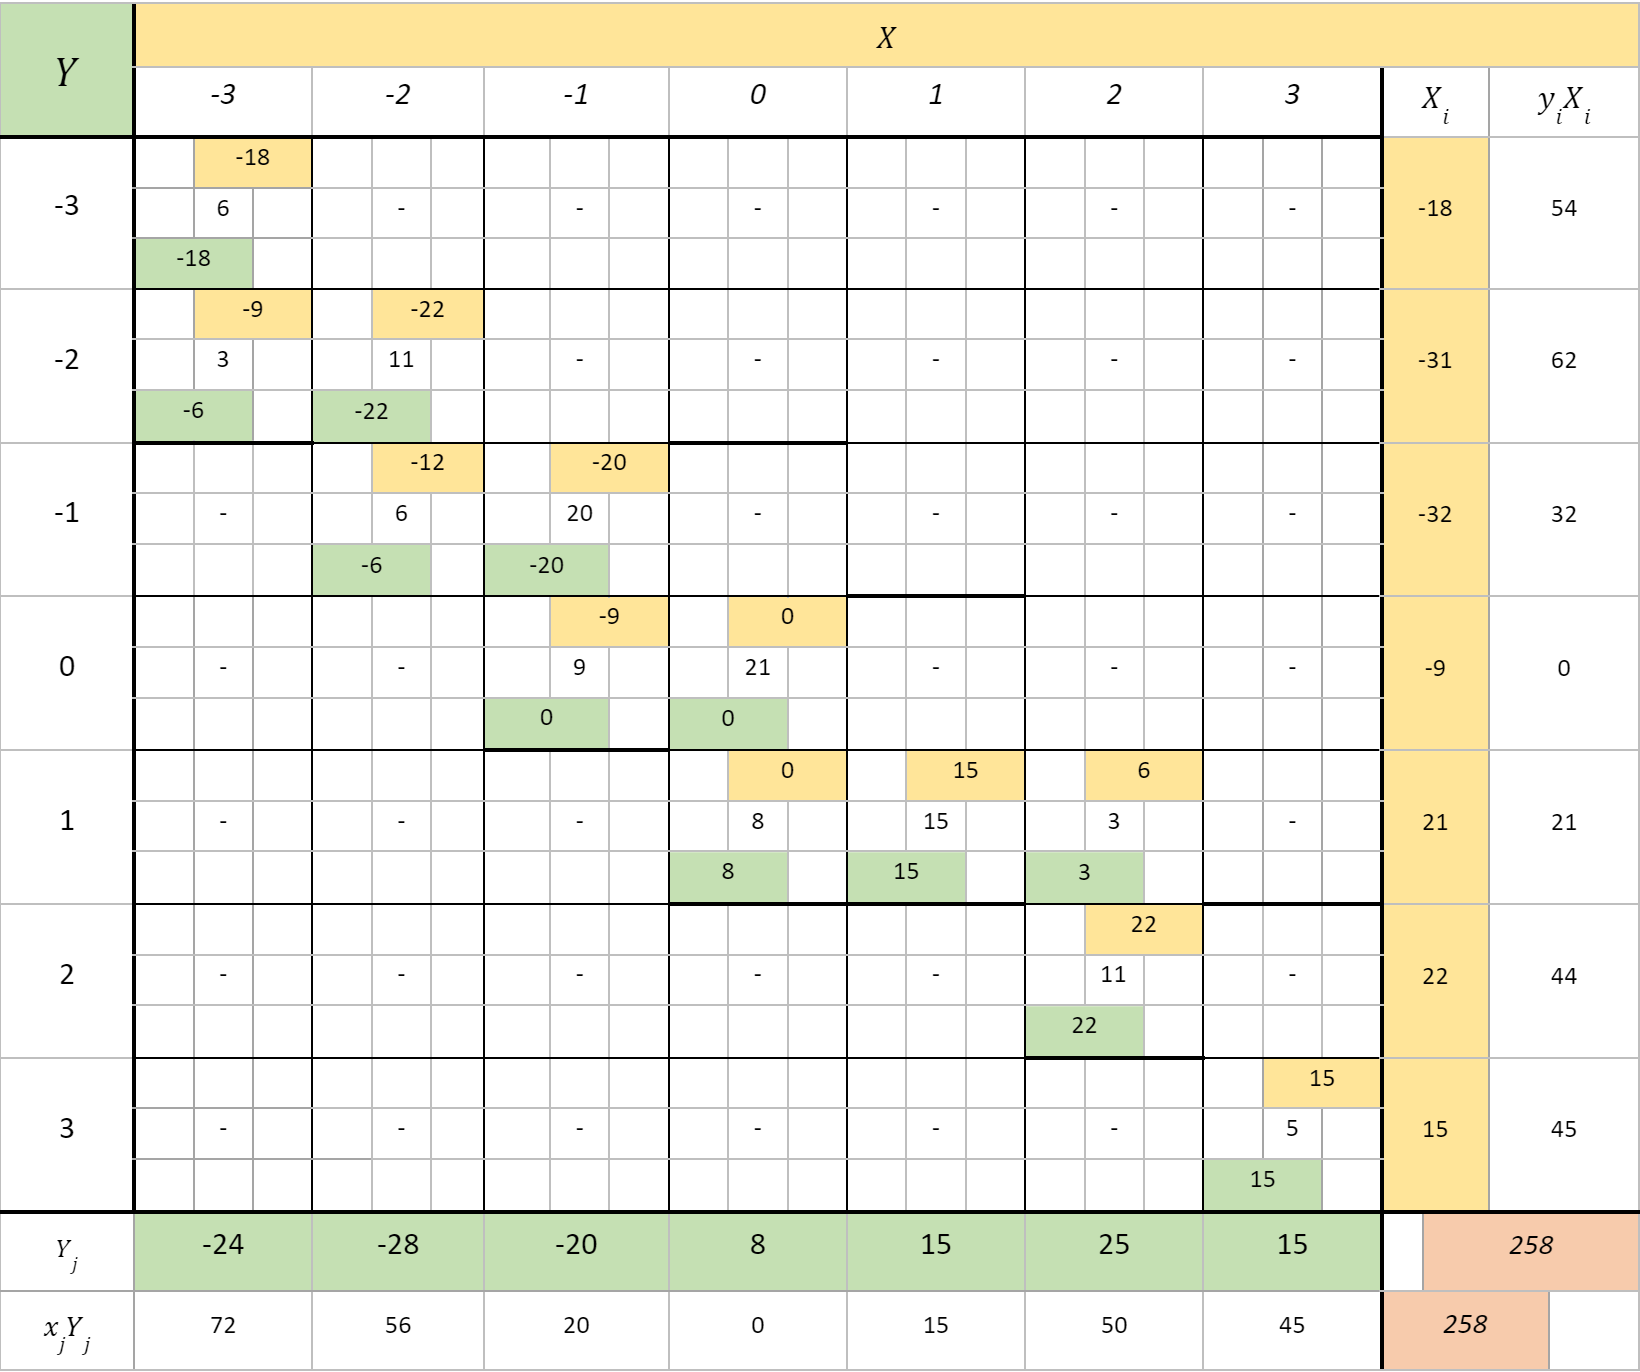

$$
 \overline{r}_{xy}=\frac{Σ_i^{K_{y}}Σ_j^{K_{y}}n_{ij}u_iv_j-N\overline{u}_в\overline{v}_в}{NS_uS_v} =0.9816
$$

где $u_в,v_в$ – условные средние для условных вариант

$s_u,s_v$ – несмещенные СКО условных вариант

###5. Построим доверительный интервал для коэффициента корреляции при уровне значимости γ=0.95.

In [ ]:
N=118
r_xy = 0.9816
z_sv = 0.5*np.log((1+r_xy)/(1-r_xy))  # преобразование Фишера
sigma_z = 1/(np.sqrt(N-3))
z_lb_rxy = z_sv - 1.96*sigma_z  # левая граница доверительного интервала для генерального значения
z_rb_rxy = z_sv + 1.96*sigma_z  # правая граница доверительного интервала для генерального значения

# пересчитаем интервал в дов. интервал для коэф. кор. с помощью обратного преобразования Фишера
r_lb_rxy = (np.exp(2*z_lb_rxy) - 1)/(np.exp(2*z_lb_rxy) + 1)
r_rb_rxy = (np.exp(2*z_rb_rxy) - 1)/(np.exp(2*z_rb_rxy) + 1)
print(f"({r_lb_rxy};{r_rb_rxy})")

(0.9735874082577566;0.9871976390228587)


**Вывод:** интервал (0.9735874082577566;0.9871976390228587) с вероятностью 0.95 покрывает истинное значение коэффициента корреляции.

###6. Осуществим проверку статистической гипотезы о равенстве коэффициента корреляции нулю при заданном уровне значимости α=0.05.

In [ ]:
T_obs = (r_xy*np.sqrt(N-2))/(np.sqrt(1-r_xy**(2)))
print(f"Наблюдаемое значение критерия: {T_obs}")

t_krit = 1.984
print(f"Критическое значение: {t_krit}")

Наблюдаемое значение критерия: 55.366444624836774
Критическое значение: 1.984


**Вывод:** Наблюдаемое значение больше критического, значит нулевую гипотезу о равенстве нулю коэффициента корреляции нужно отвергнуть.

## Выводы

В ходе выполнения данной лабораторной работы были освоение основные понятия, связанные с корреляционной зависимостью между случайными величинами, статистическими гипотезами и проверкой их «справедливости». Построен двумерный интервальный вариционный ряд, по которому построена корреляционная таблица и вычислен выборочный коэффициент корреляции. Коэффициент подсчитан как с помощью стандартной формулы, так и с помощью условных вариант. Оба способа показали одинаковый результат и сделан вывод о положительной корреляционной зависимости. Это же подтверждено с помощью построения доверительного интервала и проверки статистической гипотезы.